Observations:
    1. The Capomulin and Ramicane drug regimens were the most effective at decreasing tumor volume.
    2. Initially, it seems as though there was a direct correlation between tumor volume and weight, however
    Mouse ID l509's weight remained constant at every level of tumor volume. This mouse was on the Capomulin drug
    regimen and although his tumor volume increase in the beginning stages of the regimen, the tumor volume
    decreased significantly over the time of the study proving the effectivness of the drug.  
    3. Mouse ID g989 data that was ommitted from the results was being treated with one of the more ineffective 
    regimens. In some cases, this may have been a very costly loss and had a negative effect on the study,
    however, this did not seem to have an effect on the study overall.
     

In [1]:
# Insert dependencies/packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Assign data files to variables
mouse_metadata_path = "Homework/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Homework/Pymaceuticals/data/Study_results.csv"

In [3]:
#Read in data
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

In [4]:
#look at the data to get an idea of what it looks like. 'display allows you to see both data frames in one cell'
display(mouse_df.head())
display(mouse_df.tail())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29
248,z969,Naftisol,Male,9,30


In [5]:
display(study_df.head())
display(study_df.tail())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4
1892,b879,45,72.555239,2


In [6]:
mouse_df[["Mouse ID","Drug Regimen"]].head()

,Mouse ID,Drug Regimen
0,k403,Ramicane
1,s185,Capomulin
2,x401,Capomulin
3,m601,Capomulin
4,g791,Ramicane


In [7]:
mouse_df['Mouse ID'].value_counts()

s710    1
u327    1
s185    1
c302    1
i738    1
       ..
s508    1
m550    1
c559    1
x111    1
c757    1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
mouse_df.groupby(by='Mouse ID')['Mouse ID'].count()

Mouse ID
a203    1
a251    1
a262    1
a275    1
a366    1
       ..
z435    1
z578    1
z581    1
z795    1
z969    1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
study_df.groupby(by='Mouse ID')['Mouse ID'].count()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
#mouse_study = pd.concat([mouse_df, study_df])
#mouse_study.head()
#Concat didnt work because it just added to the data, not merge the data.

In [11]:
#Merge both tables into one dataset
mouse_study_merge = pd.merge(left=mouse_df, right=study_df, how="left",on="Mouse ID")
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
#Find the unique Mouse IDs
unique_mice_merge = mouse_study_merge['Mouse ID'].nunique()
print(f'There are {unique_mice_merge} mice in this dataset.')

There are 249 mice in this dataset.


In [13]:
#Find the duplicate Mouse IDs
duped_id = mouse_study_merge[mouse_study_merge.duplicated(['Mouse ID', 'Timepoint',]) == True] ['Mouse ID']
duped_id

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [14]:
#Optional: Get all the data for the duplicate Mouse ID
mouse_study_merge[mouse_study_merge['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
#Get all the data for the Mouse ID that are not duplicates
mouse_study_merge[mouse_study_merge['Mouse ID'] !='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
#Create a clean DataFrame by dropping the duplicate by Mouse ID
mouse_study_clean = mouse_study_merge[mouse_study_merge['Mouse ID']!='g989']

In [17]:
#Check the number of mice in the clean DataFrame
n_mice_clean = mouse_study_clean['Mouse ID'].nunique()
print(f'There are {n_mice_clean} mice in this dataset.')

There are 248 mice in this dataset.


In [18]:
#Generate as Summary Statistics Table of mean, median, variance, standard deviation, and SEM of the tumor volume
mouse_study_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std','var', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [19]:
#number of mice per treatment across all timepoints
mouse_study_clean['Drug Regimen'].value_counts()
#assign it to a variable
mice_counts_for_treatment = mouse_study_clean['Drug Regimen'].value_counts()
#Note: this created a panda series that can be used to create a bar plot
mice_counts_for_treatment

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

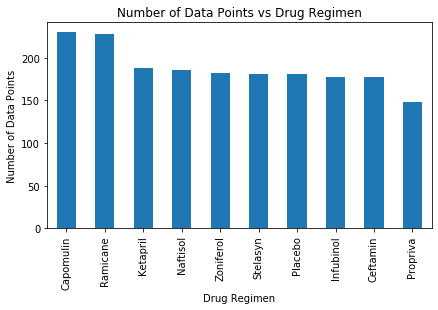

In [20]:
#Bar plot using pandas and the df or series
mice_counts_for_treatment.plot(kind='bar')
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Drug Regimen');           

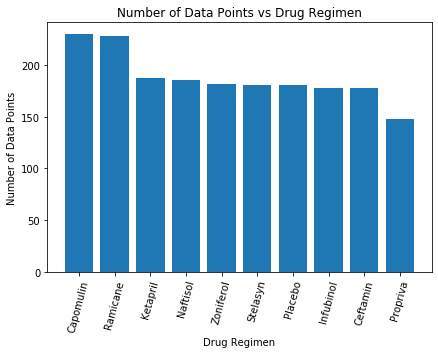

In [21]:
plt.bar(mice_counts_for_treatment.index, mice_counts_for_treatment.values)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=75)
plt.title('Number of Data Points vs Drug Regimen'); 

In [22]:
gender_counts = mouse_study_merge['Sex'].value_counts()
gender_counts

Male      958
Female    935
Name: Sex, dtype: int64

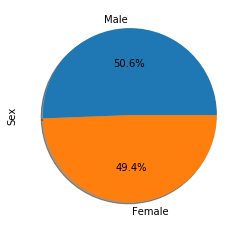

In [23]:
#Create a pie chart using Pandas's DataFrame.plot()
gender_counts.plot(kind='pie', autopct="%1.1f%%", shadow=True);

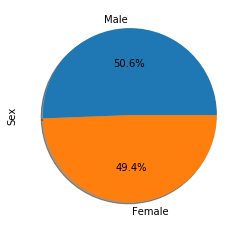

In [24]:
#Create a pie chart using Matplotlib's pyplot
plt.pie(gender_counts, labels =gender_counts.index.values,autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex');

In [25]:
#Create a series to be put in a DataFrame with Drug Regimen and Tumor Volume
mouse_study_clean.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [26]:
#Merge the data sets to get the tumor volume at the specific time point
capomulin_stats = mouse_study_merge.loc[mouse_study_merge['Drug Regimen']=="Capomulin"]
ramicane_stats = mouse_study_merge.loc[mouse_study_merge['Drug Regimen']=="Ramicane"]
infubinol_stats = mouse_study_merge.loc[mouse_study_merge['Drug Regimen']=="Infubinol"]
ceftamin_stats = mouse_study_merge.loc[mouse_study_merge['Drug Regimen']=="Ceftamin"]


In [27]:
#group the data to get the max and min time points for each mouse
capomulin_volume = capomulin_stats.groupby('Mouse ID')['Timepoint'].max()
cap_df = pd.DataFrame(capomulin_volume)
#Merge the original data with the specific drug data to match by Mouse ID
cap_df_merge = pd.merge(cap_df, mouse_study_merge,on=("Mouse ID","Timepoint"),how="left")
#cap_df_merge

In [28]:
#Calculate the IQR and determine if there are any outliers
tumor_growth_cap = cap_df_merge['Tumor Volume (mm3)']
quartiles = tumor_growth_cap.quantile([.25, .5, .75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [29]:
ramicane_volume = ramicane_stats.groupby('Mouse ID')['Timepoint'].max()
ram_df = pd.DataFrame(ramicane_volume)
ram_df_merge = pd.merge(ram_df, mouse_study_merge,on=("Mouse ID","Timepoint"),how="left")

In [30]:
tumor_growth_ram = ram_df_merge['Tumor Volume (mm3)']
quartiles = tumor_growth_ram.quantile([.25, .5, .75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [31]:
infubinol_volume = infubinol_stats.groupby('Mouse ID')['Timepoint'].max()
inf_df = pd.DataFrame(infubinol_volume)
inf_df_merge = pd.merge(infubinol_volume, mouse_study_merge,on=("Mouse ID","Timepoint"),how="left")

In [32]:
tumor_growth_inf = inf_df_merge['Tumor Volume (mm3)']
quartiles = tumor_growth_inf.quantile([.25, .5, .75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [33]:
ceftamin_volume = ceftamin_stats.groupby('Mouse ID')['Timepoint'].max()
cef_df = pd.DataFrame(ceftamin_volume)
cef_df_merge = pd.merge(ceftamin_volume, mouse_study_merge,on=("Mouse ID","Timepoint"),how="left")

In [34]:
tumor_growth_cef = cef_df_merge['Tumor Volume (mm3)']
quartiles = tumor_growth_cef.quantile([.25, .5, .75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


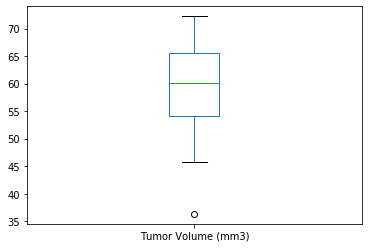

In [35]:
inf_df_merge['Tumor Volume (mm3)'].plot(kind='box');

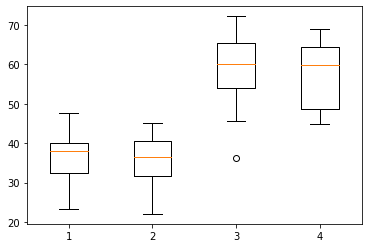

In [36]:
#Combine all box plots in one graph
plt.boxplot([tumor_growth_cap, tumor_growth_ram, tumor_growth_inf, tumor_growth_cef]);

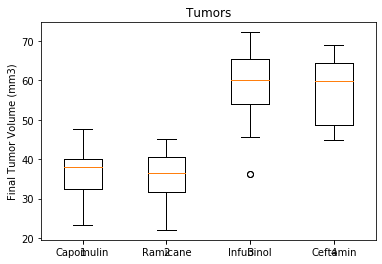

In [37]:
#Assign box plots to a variable and label
tumor_volume_boxplots = [tumor_growth_cap, tumor_growth_ram, tumor_growth_inf, tumor_growth_cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_boxplots)
ax1.boxplot(tumor_volume_boxplots, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

In [38]:
#Find data on one mouse to create line plot of time point vs tumor volume
lucky_mouse = capomulin_stats.loc[capomulin_stats['Mouse ID'] =='l509']
lucky_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


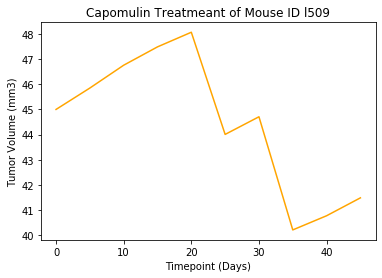

In [39]:
#Create line plot of time point vs tumor volume and label
x_axis_data = lucky_mouse['Timepoint']
tumor_volume_data = lucky_mouse['Tumor Volume (mm3)']

plt.title('Capomulin Treatmeant of Mouse ID l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis_data, tumor_volume_data, color="orange")

plt.show()

In [40]:
#Group the Capomulin stats by the Mouse ID and mean in order to get the average tumor volume for Capomulin
weight_vs_tumor = capomulin_stats.groupby(['Mouse ID']).mean()
weight_vs_tumor.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


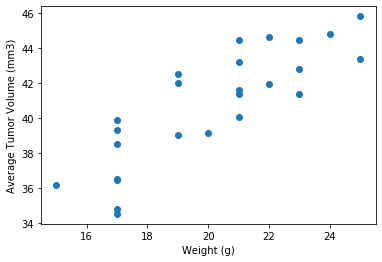

In [41]:
#Create a scatter plot of the mouse weight vs average tumor volume for Capomulin and label
plt.scatter(weight_vs_tumor['Weight (g)'],weight_vs_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [42]:
# Calculate the correlation coefficient 
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight_vs_tumor['Weight (g)'],weight_vs_tumor['Tumor Volume (mm3)'])[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [43]:
#Calculate the linear regression 
st.linregress(weight_vs_tumor['Weight (g)'],weight_vs_tumor['Tumor Volume (mm3)'])

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [44]:
#Assign a variable to the slope and intercept
slope= 0.9544396890241045
intercept = 21.552160532685015

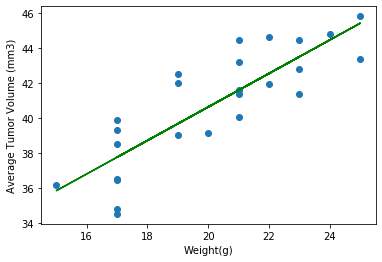

In [45]:
y_values = weight_vs_tumor['Weight (g)']*slope+intercept
plt.scatter(weight_vs_tumor['Weight (g)'],weight_vs_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(weight_vs_tumor['Weight (g)'],y_values,color="green")
plt.show()